In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv('D:/Shreyansh/Learning/Udemy/economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# Drop unnecessary columns

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)  #axis =1 for dropping columns, axis=0 means dropping rows

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
## Check null values 

df_index.isnull().sum()    # We do not have any null values 

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

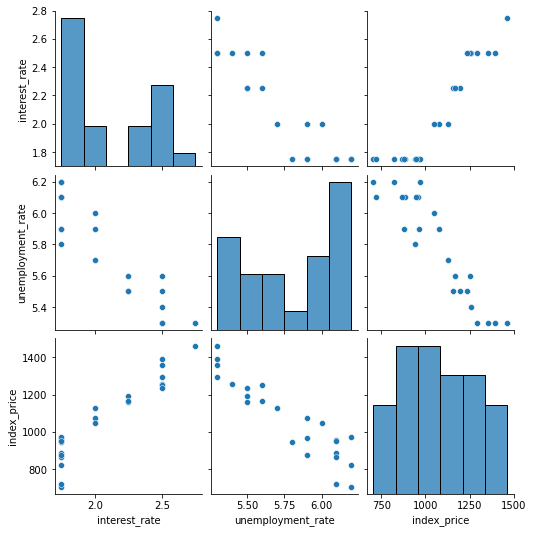

In [6]:
## Let's do some visualiztion

import seaborn as sns
sns.pairplot(df_index)

# We are geeting inverse relation b/w interest rate and unemployment rate, index price and unemployment rate while some kind of linear relation
# b/w interest rate and index price

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


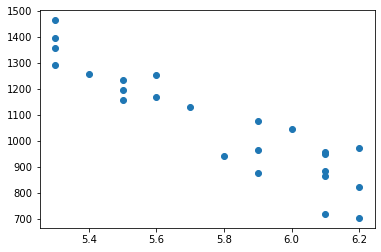

In [8]:
## Visualize the data points more closely
plt.scatter(df_index['unemployment_rate'], df_index['index_price'])

Text(0, 0.5, 'Unemployment Rate')

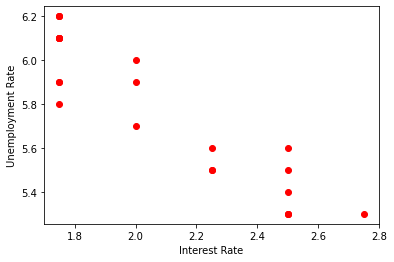

In [9]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r' )
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [10]:
## Dependent and dependent features 

X_1=df_index[['interest_rate','unemployment_rate']]

# OR you can use below

X=df_index.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y=df_index.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
import seaborn as sns

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

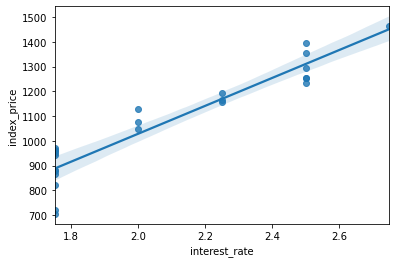

In [14]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='unemployment_rate', ylabel='index_price'>

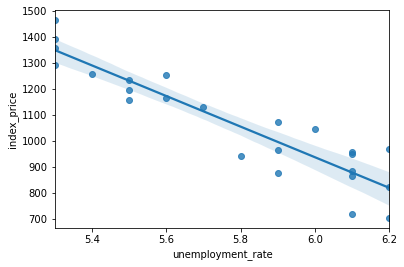

In [15]:
sns.regplot(df_index['unemployment_rate'],df_index['index_price'])

In [16]:
## Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
## Cross validation

from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(regression,X_train,y_train,cv=3,scoring='neg_mean_squared_error')
cross_validation

# Results are MSE values for eack cross validation (5 different MSE values are calculated in our case) & then we take the mean
# to get one final value. Cross Validation is commonly used in Machine Learning to compare different models and select the most appropriate one for a specific problem

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [20]:
np.mean(cross_validation)

-5914.828180162388

In [21]:
## Prediction 

y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [22]:
## Performance matrix 

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [23]:
## R squared & Adjusted R squared 

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8278978091457142

In [24]:
X_test.shape[1]

2

In [25]:
X_test[0].shape

(2,)

In [26]:
adj_r2_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r2_score

0.713163015242857

## Assumptions

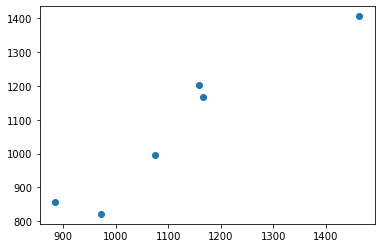

In [27]:
plt.scatter(y_test,y_pred)  # from graph Linear relation b/w y_pred and y_test 

In [29]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

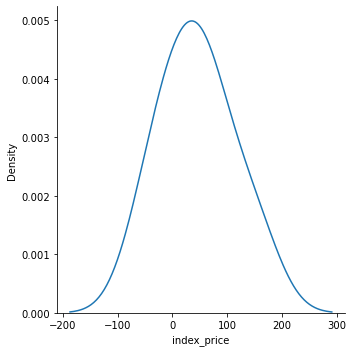

In [30]:
## Plot this residuals

sns.displot(residuals,kind='kde')  # Normally distributed graph which means model created is good

Text(0, 0.5, 'Residuals')

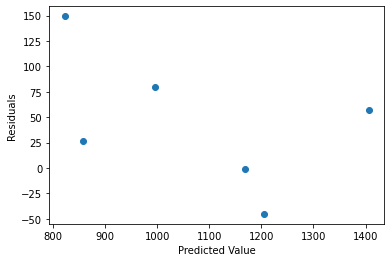

In [32]:
## Create a scatter plot w.r.t predictions and residuals
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')

# Graph shows uniform distribution

In [38]:
## Compute using OLS

import statsmodels.api as sm
model =sm.OLS(y_train,X_train).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 17 Aug 2024   Prob (F-statistic):                       0.754
Time:                        18:15:33   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(regression.coef_)

[  88.27275507 -116.25716066]
